In [1]:
import warnings
import matplotlib.pyplot as matplt
import pandas as panda
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sean

warnings.filterwarnings('ignore')

In [2]:
# dataset_CC is a dataframe where we load the csv data.
dataset_CC = panda.read_csv("D:\Machine Learning\Assignment 5\datasets\CC.csv")
dataset_CC.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# delete CUST_ID
customerDf = dataset_CC.drop(['CUST_ID'], axis='columns')
customerDf.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Checking the columns having null values and displaying the resultant columns.
#columnsWithNullValues = dataset_CC.isna().any()
dataset_CC.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [5]:
#Replacing the null values with the mean
dataset_CC.fillna(dataset_CC.mean(), inplace=True)
# Verifying the dataframe again for null values
dataset_CC.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [6]:
#To select rows and columns
x = dataset_CC.iloc[:,1:-1]
y = dataset_CC.iloc[:,-1]
print(x.shape,y.shape)

(8950, 16) (8950,)


# a.Apply PCA on CC dataset.

In [7]:
pca = PCA(3)
x_pca = pca.fit_transform(x)
principalDf = panda.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
result_df= panda.concat([principalDf, dataset_CC.iloc[:,-1]], axis = 1)
result_df.head()

,principal component 1,principal component 2,principal component 3,TENURE
0,-4326.383979,921.566882,183.708383,12
1,4118.916665,-2432.846346,2369.969289,12
2,1497.907641,-1997.578694,-2125.631328,12
3,1394.548536,-1488.743453,-2431.799649,12
4,-3743.351896,757.342657,512.476492,12


In [12]:
#To select rows and columns
X = result_df.iloc[:,0:-1]
y = result_df.iloc[:,-1]

In [13]:
nclusters = 5 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x_pca)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x_pca)

#Calculate sihouette Score
from sklearn import metrics
score = metrics.silhouette_score(x_pca, y_cluster_kmeans)
print(score)

0.4553302964921528


# b. Apply k-means algorithm on the PCA result and report your observation if the silhouette score has improved or not?Use elbow method to find optimal number of clusters

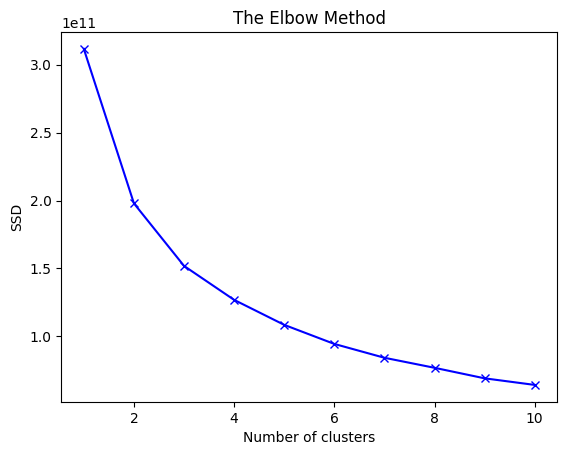

In [14]:
SSD = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(result_df)
    SSD.append(kmeans.inertia_)
matplt.plot(range(1, 11), SSD,'bx-')
matplt.title('The Elbow Method')
matplt.xlabel('Number of clusters')
matplt.ylabel('SSD')
matplt.show()

In [15]:
km = KMeans(n_clusters=3)
km.fit(result_df)

KMeans(n_clusters=3)

In [16]:
y_cluster_kmeans = km.predict(result_df)

In [17]:
score = metrics.silhouette_score(result_df, y_cluster_kmeans)
print("\nSilhouette Score for the above cluster is : ", score)


Silhouette Score for the above cluster is :  0.5109768823046488


It improved the silhouette score after applying k-means algorithm on the PCA result 

# c. Perform Scaling+PCA+K-Means and report performance

In [18]:
scaler = StandardScaler()
X_Scale = scaler.fit_transform(x)

In [19]:
pca2 = PCA(n_components=3)
principalComponents = pca2.fit_transform(X_Scale)
principalDf = panda.DataFrame(data=principalComponents,
                           columns=['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = panda.concat([principalDf, customerDf[['BALANCE']]], axis=1)
print("\nThe Dataframe after applying PCA : \n", finalDf)


The Dataframe after applying PCA : 
       principal component 1  principal component 2  principal component 3  \
0                 -1.718893              -1.072939               0.535700   
1                 -1.169307               2.509321               0.627960   
2                  0.938415              -0.382602               0.161243   
3                 -0.907503               0.045859               1.521687   
4                 -1.637830              -0.684975               0.425703   
...                     ...                    ...                    ...   
8945              -0.025276              -2.034127              -1.292044   
8946              -0.233113              -1.656652              -1.559896   
8947              -0.593879              -1.828115              -0.755817   
8948              -2.007672              -0.673767               0.714348   
8949              -0.217933              -0.418490               0.734346   

          BALANCE  
0       40.900749

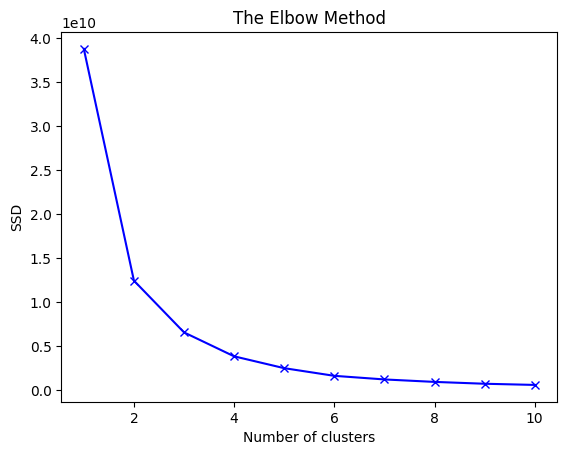

In [20]:
SSD = []  # SSD is the sum of squared distance between each point and the centroid in a cluster
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(finalDf)
    SSD.append(kmeans.inertia_)
matplt.plot(range(1, 11), SSD,'bx-')
matplt.title('The Elbow Method')
matplt.xlabel('Number of clusters')
matplt.ylabel('SSD')
matplt.show()

In [21]:
km = KMeans(n_clusters=2)
km.fit(finalDf)

KMeans(n_clusters=2)

In [22]:
y_cluster_kmeans = km.predict(finalDf)

In [23]:
score = metrics.silhouette_score(finalDf, y_cluster_kmeans)
print("\nSilhouette Score for the above cluster is : ", score)


Silhouette Score for the above cluster is :  0.7402986008538263


# 2. Use pd_speech_features.csv   

In [24]:
#dataframe is loaded into speech_features_dataset 
speech_features_dataset=panda.read_csv('D:\Machine Learning\Assignment 5\datasets\pd_speech_features.csv')
speech_features_dataset.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


# a. Perform Scaling 


In [25]:
#Perform Scaling on the dataset

ret =speech_features_dataset.iloc[:,1:]
speech_scaler = StandardScaler()
speech_scaler.fit(ret)
speech_x_scaler = speech_scaler.transform(ret)

# b. Apply PCA (k=3)

In [26]:


#b.Applying the PCA 
PCA_Speech = PCA(3)
speech_x_pca = PCA_Speech.fit_transform(speech_x_scaler)
speech_df2 = panda.DataFrame(data=speech_x_pca)
speech_modified = panda.concat([speech_df2,speech_features_dataset[['class']]],axis=1)

speech_modified.head()

,0,1,2,class
0,-10.052430,1.476818,-6.828355,1
1,-10.641066,1.590405,-6.811678,1
2,-13.520081,-1.243924,-6.794532,1
3,-9.142526,8.848864,15.300298,1
4,-6.758091,4.624217,15.645685,1


# c.Use SVM to report performance 

In [27]:
#Using Linear Support Vector Machine to report performance 
    
Nor_speech= SVC(kernel='linear') 


Speech_x =speech_modified.iloc[:,:-1]
speech_y =speech_modified.iloc[:,-1]



speech_x_train, speech_x_test, speech_y_train, speech_y_test = train_test_split(Speech_x, speech_y, test_size=0.33, random_state=42)


Nor_speech.fit(speech_x_train, speech_y_train)


Speech_y_prediction=Nor_speech.predict(speech_x_test)

# Calculating the  accuracy score

accuracy_score(speech_y_test, Speech_y_prediction)


print("svm accuracy =", accuracy_score(speech_y_test, Speech_y_prediction))

svm accuracy = 0.768


In [28]:
#Displaying the accuracy report 
print(classification_report(speech_y_test, Speech_y_prediction))

              precision    recall  f1-score   support

           0       0.82      0.20      0.33        69
           1       0.76      0.98      0.86       181

    accuracy                           0.77       250
   macro avg       0.79      0.59      0.59       250
weighted avg       0.78      0.77      0.71       250



# 3. Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2

In [29]:
# Iris Dataset is loaded into iris_dataset

iris_dataset = panda.read_csv("D:\Machine Learning\Assignment 5\datasets\iris.csv")

iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
# Applying the scalar to the dataset

standard_sclar_Isri = StandardScaler()
standard_X = standard_sclar_Isri.fit_transform(iris_dataset.iloc[:,:-1].values)


In [31]:
#applying the label encoder to the dataset

Standard_label = LabelEncoder()

standard_y = Standard_label.fit_transform(iris_dataset['Species'].values)

In [32]:
#Performing the Linear Discriminant Analysis
Linear_Discriminant = LinearDiscriminantAnalysis(n_components=2)
lda_iris = Linear_Discriminant.fit_transform(standard_X ,standard_y)

In [33]:
iris_dataset.drop(['Id'], axis=1, inplace=True)

In [34]:
#Displaying the LDA results and the class

iris_data=panda.DataFrame(lda_iris)
iris_data['class']=standard_y
iris_data.columns=["LD1","LD2","class"]
iris_data.head()

,LD1,LD2,class
0,-10.036763,-0.451330,0
1,-9.172930,-1.477234,0
2,-9.480989,-0.979693,0
3,-8.818119,-1.408602,0
4,-9.960200,-0.112546,0


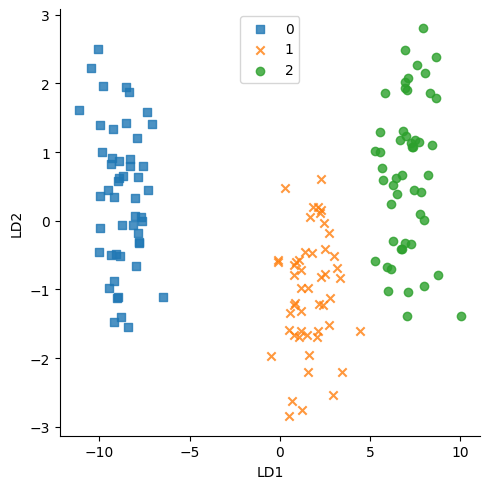

In [35]:
# Plotting the graph
irirs_data_mark = ['s', 'x', 'o']
iris_data_colors = ['r', 'b', 'g']
sean.lmplot(x="LD1", y="LD2", data=iris_data, hue='class', markers=irirs_data_mark, fit_reg=False, legend=False)
matplt.legend(loc='upper center')
matplt.show()

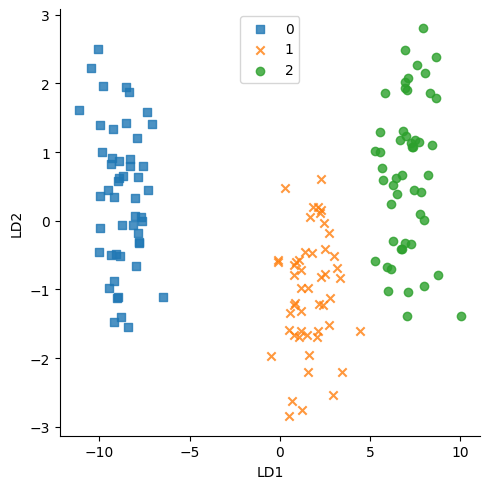

In [36]:
# Plotting the graph
irirs_data_mark = ['s', 'x', 'o']
iris_data_colors = ['r', 'b', 'g']
sean.lmplot(x="LD1", y="LD2", data=iris_data, hue='class', markers=irirs_data_mark, fit_reg=False, legend=False)
matplt.legend(loc='upper center')
matplt.show()

# 4. Briefly identify the difference between PCA and LDA 

PCA is an unsupervised learning algorithm while LDA is a supervised learning algorithm. Consequently, 

A principal component analysis (PCA) does not take into consideration class labels but emphasizes finding the principal components with the greatest variance. Thus it is an unsupervised algorithm. By contrast, LDA is a supervised algorithm that aims to identify linear discriminants that represent the axes that maximize separation between classes.

LDA performs better on multi-class classification tasks than PCA. However, PCA performs better when the sample size is comparatively small. In image classification, comparisons of classification accuracy could be made.

Both LDA and PCA are used in the case of dimensional reduction. Generally, PCA is followed by LDA.